# Principal Component Analysis (PCA) on Wine Quality Dataset

## Overview
In this notebook, I'll implement Principal Component Analysis (PCA) to explore the Wine Quality dataset. PCA is a powerful dimensionality reduction technique that helps identify the most important features and patterns in high-dimensional data by transforming it into a lower-dimensional space while preserving maximum variance.

## Dataset
I'll use the Wine Quality dataset which contains physicochemical properties of wines and their quality ratings. This dataset is perfect for PCA analysis as it has multiple correlated features that can be reduced to fewer, more meaningful components.

### Features:
- **Fixed Acidity**: Tartaric acid content
- **Volatile Acidity**: Acetic acid content 
- **Citric Acid**: Citric acid content
- **Residual Sugar**: Remaining sugar after fermentation
- **Chlorides**: Salt content
- **Free Sulfur Dioxide**: Free SO2 content
- **Total Sulfur Dioxide**: Total SO2 content
- **Density**: Wine density
- **pH**: Acidity level
- **Sulphates**: Potassium sulfate content
- **Alcohol**: Alcohol percentage
- **Quality**: Target variable (wine quality score)

## Objectives
1. **Explore Data**: Understand correlations and distributions
2. **Apply PCA**: Reduce dimensionality while preserving information
3. **Analyze Components**: Interpret principal components and their meanings
4. **Visualize Results**: Create comprehensive visualizations
5. **Evaluate Impact**: Assess how PCA affects data representation


In [2]:
%pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 9.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# PCA and preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

# Machine learning for comparison
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Visualization and analysis
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style for visualizations
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("All libraries imported successfully!")


All libraries imported successfully!


## 1. Data Loading and Exploration

Let me load the Wine Quality dataset and examine its structure, distributions, and relationships between features.


In [4]:
# Load the Wine Quality dataset
print("Loading Wine Quality dataset...")
df = pd.read_csv('../datasets/WineQT.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Basic information about the dataset
print(f"\n=== DATASET OVERVIEW ===")
print(f"Total wine samples: {len(df):,}")
print(f"Number of features: {df.shape[1]}")
print(f"Data types:")
print(df.dtypes.value_counts())

print(f"\n=== MISSING VALUES ===")
missing_values = df.isnull().sum()
print(f"Total missing values: {missing_values.sum()}")
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("No missing values found!")

# Display basic info and first few rows
print(f"\n=== DATASET INFO ===")
print(df.info())

print(f"\n=== FIRST FEW ROWS ===")
df.head()


Loading Wine Quality dataset...
Dataset loaded successfully!
Dataset shape: (1143, 13)
Memory usage: 0.11 MB

=== DATASET OVERVIEW ===
Total wine samples: 1,143
Number of features: 13
Data types:
float64    11
int64       2
Name: count, dtype: int64

=== MISSING VALUES ===
Total missing values: 0
No missing values found!

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-nu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
# Remove Id column as it's not a feature
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)
    print("Removed 'Id' column")

# Analyze wine quality distribution
print("=== WINE QUALITY ANALYSIS ===")
quality_counts = df['quality'].value_counts().sort_index()
print("Quality distribution:")
for quality, count in quality_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  Quality {quality}: {count} wines ({percentage:.1f}%)")

print(f"\nQuality statistics:")
print(f"  Mean quality: {df['quality'].mean():.2f}")
print(f"  Median quality: {df['quality'].median():.2f}")
print(f"  Quality range: {df['quality'].min()} - {df['quality'].max()}")

# Separate features and target
feature_columns = [col for col in df.columns if col != 'quality']
X = df[feature_columns].copy()
y = df['quality'].copy()

print(f"\n=== FEATURE ANALYSIS ===")
print(f"Number of features for PCA: {len(feature_columns)}")
print(f"Features: {feature_columns}")

# Basic statistics
print(f"\n=== FEATURE STATISTICS ===")
df[feature_columns].describe()


Removed 'Id' column
=== WINE QUALITY ANALYSIS ===
Quality distribution:
  Quality 3: 6 wines (0.5%)
  Quality 4: 33 wines (2.9%)
  Quality 5: 483 wines (42.3%)
  Quality 6: 462 wines (40.4%)
  Quality 7: 143 wines (12.5%)
  Quality 8: 16 wines (1.4%)

Quality statistics:
  Mean quality: 5.66
  Median quality: 6.00
  Quality range: 3 - 8

=== FEATURE ANALYSIS ===
Number of features for PCA: 11
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

=== FEATURE STATISTICS ===


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000


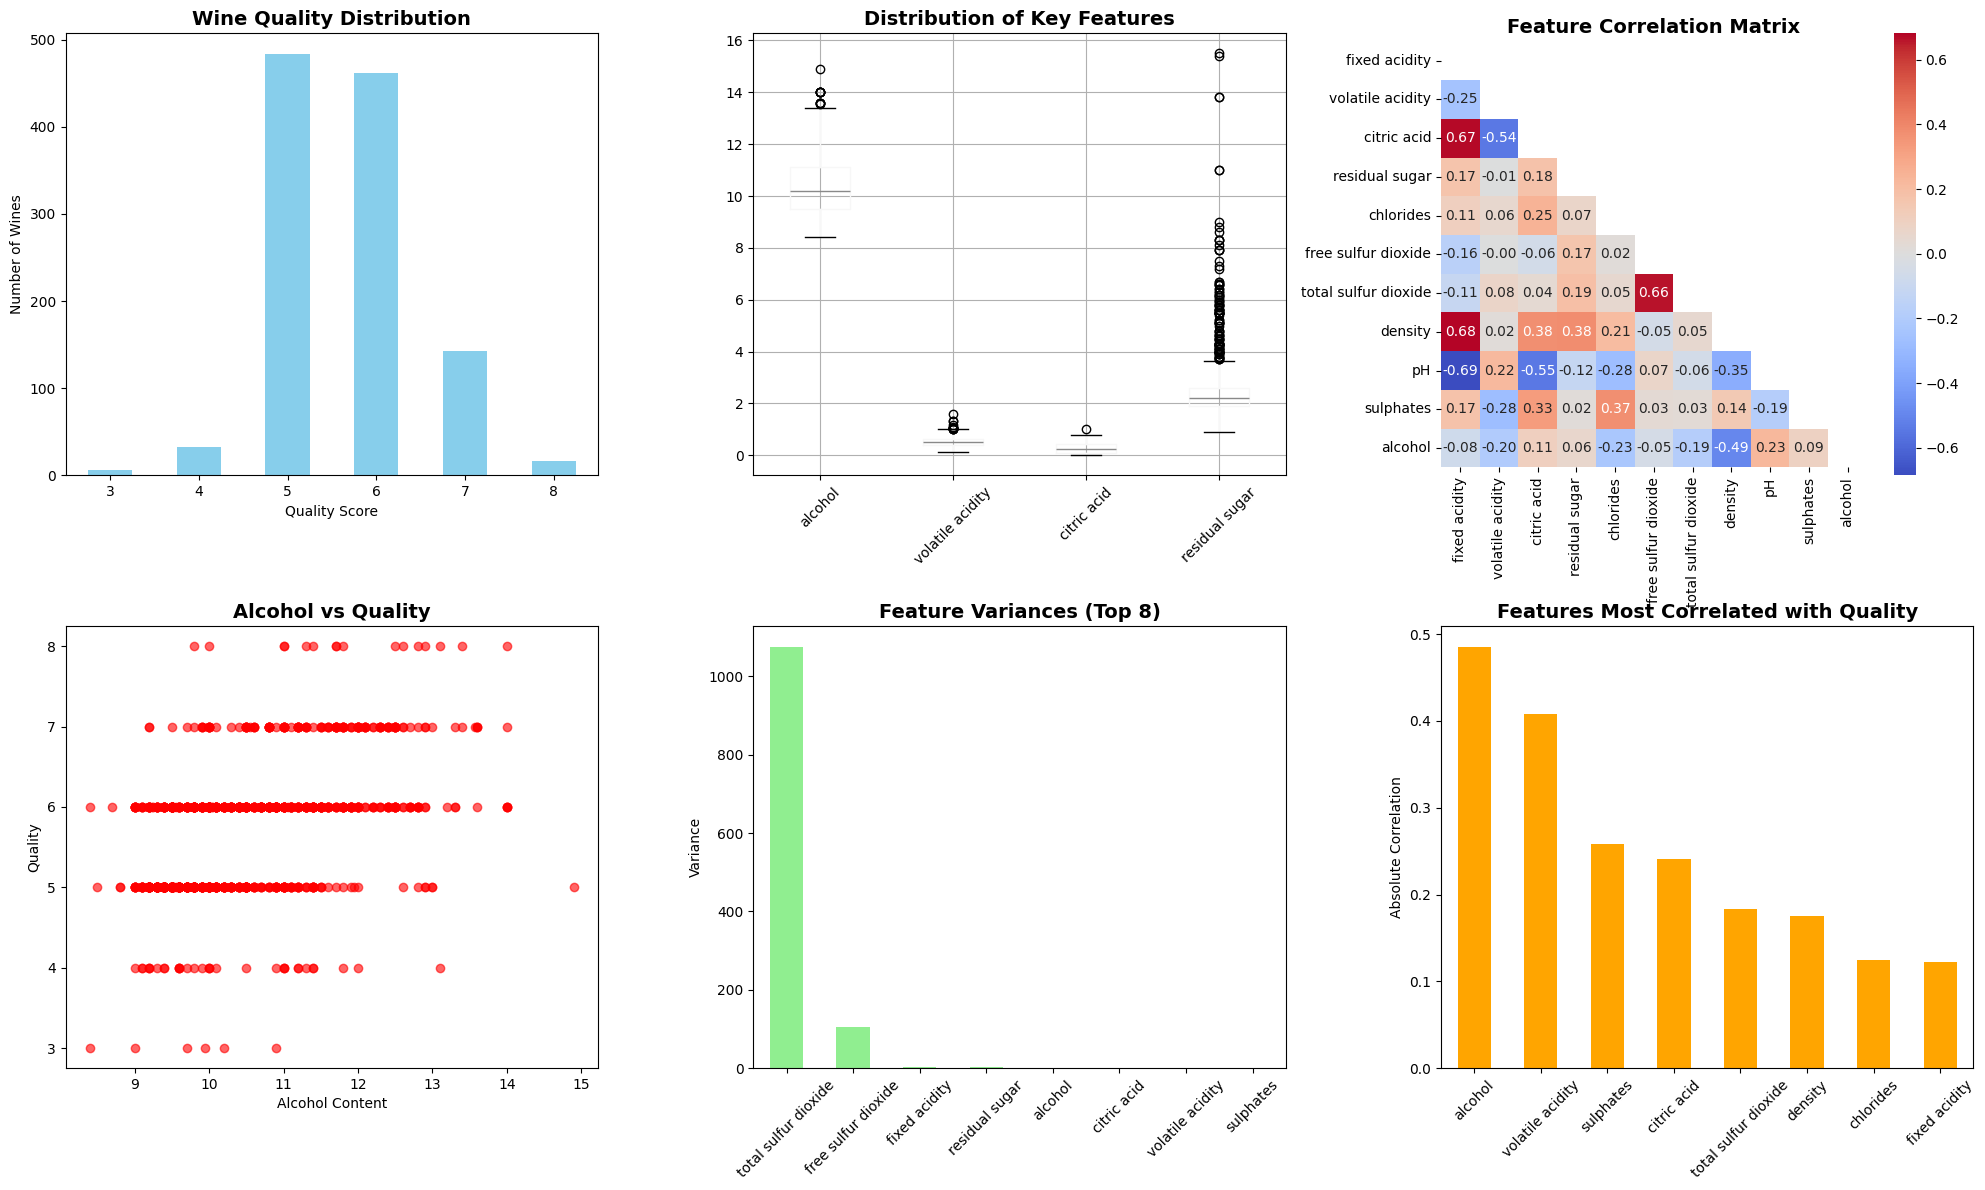

=== CORRELATION INSIGHTS ===
Features most correlated with quality:
  alcohol: 0.485
  volatile acidity: 0.407
  sulphates: 0.258
  citric acid: 0.241
  total sulfur dioxide: 0.183

Highest feature correlations (excluding quality):
  fixed acidity - pH: 0.685
  fixed acidity - density: 0.682
  fixed acidity - citric acid: 0.673
  free sulfur dioxide - total sulfur dioxide: 0.661
  citric acid - pH: 0.546


In [6]:
# Create comprehensive visualizations for data exploration
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Quality distribution
quality_counts.plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Wine Quality Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Quality Score')
axes[0, 0].set_ylabel('Number of Wines')
axes[0, 0].tick_params(axis='x', rotation=0)

# 2. Feature distributions (box plots for key features)
key_features = ['alcohol', 'volatile acidity', 'citric acid', 'residual sugar']
df[key_features].boxplot(ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Key Features', fontsize=14, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Correlation matrix of all features
correlation_matrix = X.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', ax=axes[0, 2])
axes[0, 2].set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')

# 4. Quality vs key features
axes[1, 0].scatter(df['alcohol'], df['quality'], alpha=0.6, color='red')
axes[1, 0].set_xlabel('Alcohol Content')
axes[1, 0].set_ylabel('Quality')
axes[1, 0].set_title('Alcohol vs Quality', fontsize=14, fontweight='bold')

# 5. Feature variance analysis
feature_variances = X.var().sort_values(ascending=False)
feature_variances.head(8).plot(kind='bar', ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Feature Variances (Top 8)', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Variance')
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Quality correlation with features
quality_correlation = df.corr()['quality'].abs().sort_values(ascending=False)[1:]  # Exclude self-correlation
quality_correlation.head(8).plot(kind='bar', ax=axes[1, 2], color='orange')
axes[1, 2].set_title('Features Most Correlated with Quality', fontsize=14, fontweight='bold')
axes[1, 2].set_ylabel('Absolute Correlation')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print correlation insights
print("=== CORRELATION INSIGHTS ===")
print("Features most correlated with quality:")
for feature, corr in quality_correlation.head(5).items():
    print(f"  {feature}: {corr:.3f}")

print(f"\nHighest feature correlations (excluding quality):")
# Find highest correlations between features
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.columns[i] != 'quality' and correlation_matrix.columns[j] != 'quality':
            corr_pairs.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                abs(correlation_matrix.iloc[i, j])
            ))

# Sort by correlation strength
corr_pairs.sort(key=lambda x: x[2], reverse=True)
for i, (feat1, feat2, corr) in enumerate(corr_pairs[:5]):
    print(f"  {feat1} - {feat2}: {corr:.3f}")


## 2. Data Preprocessing for PCA

Before applying PCA, I need to standardize the features since PCA is sensitive to the scale of variables. Different features have different units and ranges, so standardization is crucial.


In [7]:
# Prepare data for PCA
print("=== DATA PREPROCESSING FOR PCA ===")

# Split data for proper evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")

# Check feature scales before standardization
print(f"\n=== FEATURE SCALES (Before Standardization) ===")
print("Feature ranges:")
for col in X_train.columns:
    print(f"  {col}: {X_train[col].min():.3f} to {X_train[col].max():.3f} (range: {X_train[col].max() - X_train[col].min():.3f})")

# Standardize features (essential for PCA)
print(f"\n=== STANDARDIZATION ===")
scaler = StandardScaler()

# Fit scaler on training data only to prevent data leakage
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_columns, index=X_test.index)

print(f"Data standardized using StandardScaler")
print(f"Training set shape: {X_train_scaled_df.shape}")
print(f"Test set shape: {X_test_scaled_df.shape}")

# Verify standardization
print(f"\n=== STANDARDIZATION VERIFICATION ===")
print("After standardization (training set):")
print(f"  Mean: {X_train_scaled_df.mean().mean():.6f}")
print(f"  Std: {X_train_scaled_df.std().mean():.6f}")

print("\nSample standardized values:")
for col in X_train_scaled_df.columns[:5]:  # Show first 5 features
    print(f"  {col}: mean={X_train_scaled_df[col].mean():.3f}, std={X_train_scaled_df[col].std():.3f}")


=== DATA PREPROCESSING FOR PCA ===
Training set: 914 samples
Testing set: 229 samples
Features: 11

=== FEATURE SCALES (Before Standardization) ===
Feature ranges:
  fixed acidity: 4.600 to 15.900 (range: 11.300)
  volatile acidity: 0.120 to 1.580 (range: 1.460)
  citric acid: 0.000 to 1.000 (range: 1.000)
  residual sugar: 0.900 to 13.800 (range: 12.900)
  chlorides: 0.012 to 0.611 (range: 0.599)
  free sulfur dioxide: 1.000 to 68.000 (range: 67.000)
  total sulfur dioxide: 6.000 to 289.000 (range: 283.000)
  density: 0.990 to 1.003 (range: 0.013)
  pH: 2.740 to 4.010 (range: 1.270)
  sulphates: 0.330 to 2.000 (range: 1.670)
  alcohol: 8.400 to 14.900 (range: 6.500)

=== STANDARDIZATION ===
Data standardized using StandardScaler
Training set shape: (914, 11)
Test set shape: (229, 11)

=== STANDARDIZATION VERIFICATION ===
After standardization (training set):
  Mean: 0.000000
  Std: 1.000547

Sample standardized values:
  fixed acidity: mean=0.000, std=1.001
  volatile acidity: mean=-0

## 3. Principal Component Analysis Implementation

Now I'll apply PCA to the standardized data and analyze the results. I'll explore different numbers of components and their interpretations.


In [8]:
# Apply PCA to determine optimal number of components
print("=== APPLYING PCA ===")

# First, apply PCA with all components to analyze explained variance
pca_full = PCA()
X_train_pca_full = pca_full.fit_transform(X_train_scaled)

# Calculate explained variance ratios
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print(f"Total number of possible components: {len(explained_variance_ratio)}")
print(f"Explained variance by each component:")
for i, var_ratio in enumerate(explained_variance_ratio):
    print(f"  PC{i+1}: {var_ratio:.4f} ({var_ratio*100:.2f}%)")

print(f"\nCumulative explained variance:")
for i, cum_var in enumerate(cumulative_variance_ratio):
    print(f"  First {i+1} components: {cum_var:.4f} ({cum_var*100:.2f}%)")

# Find number of components for different variance thresholds
thresholds = [0.8, 0.85, 0.9, 0.95]
print(f"\n=== COMPONENTS NEEDED FOR VARIANCE THRESHOLDS ===")
for threshold in thresholds:
    n_components = np.where(cumulative_variance_ratio >= threshold)[0][0] + 1
    print(f"  {threshold*100:.0f}% variance: {n_components} components")

# Choose optimal number of components (e.g., 95% variance)
optimal_components = np.where(cumulative_variance_ratio >= 0.95)[0][0] + 1
print(f"\nSelected {optimal_components} components for 95% variance retention")


=== APPLYING PCA ===
Total number of possible components: 11
Explained variance by each component:
  PC1: 0.2860 (28.60%)
  PC2: 0.1662 (16.62%)
  PC3: 0.1464 (14.64%)
  PC4: 0.1151 (11.51%)
  PC5: 0.0877 (8.77%)
  PC6: 0.0608 (6.08%)
  PC7: 0.0495 (4.95%)
  PC8: 0.0366 (3.66%)
  PC9: 0.0306 (3.06%)
  PC10: 0.0160 (1.60%)
  PC11: 0.0050 (0.50%)

Cumulative explained variance:
  First 1 components: 0.2860 (28.60%)
  First 2 components: 0.4522 (45.22%)
  First 3 components: 0.5986 (59.86%)
  First 4 components: 0.7137 (71.37%)
  First 5 components: 0.8014 (80.14%)
  First 6 components: 0.8622 (86.22%)
  First 7 components: 0.9117 (91.17%)
  First 8 components: 0.9484 (94.84%)
  First 9 components: 0.9790 (97.90%)
  First 10 components: 0.9950 (99.50%)
  First 11 components: 1.0000 (100.00%)

=== COMPONENTS NEEDED FOR VARIANCE THRESHOLDS ===
  80% variance: 5 components
  85% variance: 6 components
  90% variance: 7 components
  95% variance: 9 components

Selected 9 components for 95% va

In [9]:
# Apply PCA with optimal number of components
print(f"=== APPLYING PCA WITH {optimal_components} COMPONENTS ===")

pca_optimal = PCA(n_components=optimal_components)
X_train_pca = pca_optimal.fit_transform(X_train_scaled)
X_test_pca = pca_optimal.transform(X_test_scaled)

print(f"Original feature space: {X_train_scaled.shape[1]} dimensions")
print(f"Reduced feature space: {X_train_pca.shape[1]} dimensions")
print(f"Dimensionality reduction: {((X_train_scaled.shape[1] - X_train_pca.shape[1]) / X_train_scaled.shape[1] * 100):.1f}%")
print(f"Variance retained: {cumulative_variance_ratio[optimal_components-1]*100:.2f}%")

# Create DataFrames for PCA results
pc_columns = [f'PC{i+1}' for i in range(optimal_components)]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pc_columns, index=X_train.index)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=pc_columns, index=X_test.index)

print(f"\nPCA transformation complete!")
print(f"Training set PCA shape: {X_train_pca_df.shape}")
print(f"Test set PCA shape: {X_test_pca_df.shape}")

# Analyze principal components
print(f"\n=== PRINCIPAL COMPONENT ANALYSIS ===")
components_df = pd.DataFrame(
    pca_optimal.components_,
    columns=feature_columns,
    index=pc_columns
)

print(f"Component loadings (first 3 components):")
for i in range(min(3, optimal_components)):
    pc = f'PC{i+1}'
    print(f"\n{pc} (explains {explained_variance_ratio[i]*100:.2f}% variance):")
    # Show features with highest absolute loadings
    loadings = components_df.loc[pc].abs().sort_values(ascending=False)
    for j, (feature, loading) in enumerate(loadings.head(5).items()):
        original_loading = components_df.loc[pc, feature]
        print(f"  {feature}: {original_loading:.3f} (|{loading:.3f}|)")

# Show component statistics
print(f"\n=== COMPONENT STATISTICS ===")
for i, pc in enumerate(pc_columns):
    pc_data = X_train_pca_df[pc]
    print(f"{pc}: mean={pc_data.mean():.3f}, std={pc_data.std():.3f}, range=[{pc_data.min():.2f}, {pc_data.max():.2f}]")


=== APPLYING PCA WITH 9 COMPONENTS ===
Original feature space: 11 dimensions
Reduced feature space: 9 dimensions
Dimensionality reduction: 18.2%
Variance retained: 97.90%

PCA transformation complete!
Training set PCA shape: (914, 9)
Test set PCA shape: (229, 9)

=== PRINCIPAL COMPONENT ANALYSIS ===
Component loadings (first 3 components):

PC1 (explains 28.60% variance):
  fixed acidity: 0.482 (|0.482|)
  citric acid: 0.466 (|0.466|)
  pH: -0.432 (|0.432|)
  density: 0.390 (|0.390|)
  sulphates: 0.261 (|0.261|)

PC2 (explains 16.62% variance):
  total sulfur dioxide: 0.634 (|0.634|)
  free sulfur dioxide: 0.590 (|0.590|)
  alcohol: -0.301 (|0.301|)
  residual sugar: 0.226 (|0.226|)
  volatile acidity: 0.205 (|0.205|)

PC3 (explains 14.64% variance):
  alcohol: 0.560 (|0.560|)
  volatile acidity: -0.483 (|0.483|)
  density: -0.377 (|0.377|)
  free sulfur dioxide: 0.295 (|0.295|)
  citric acid: 0.263 (|0.263|)

=== COMPONENT STATISTICS ===
PC1: mean=0.000, std=1.775, range=[-5.22, 8.75]

## 4. PCA Visualization and Analysis

I'll create comprehensive visualizations to understand the PCA results, including explained variance, component loadings, and data representation in the new space.


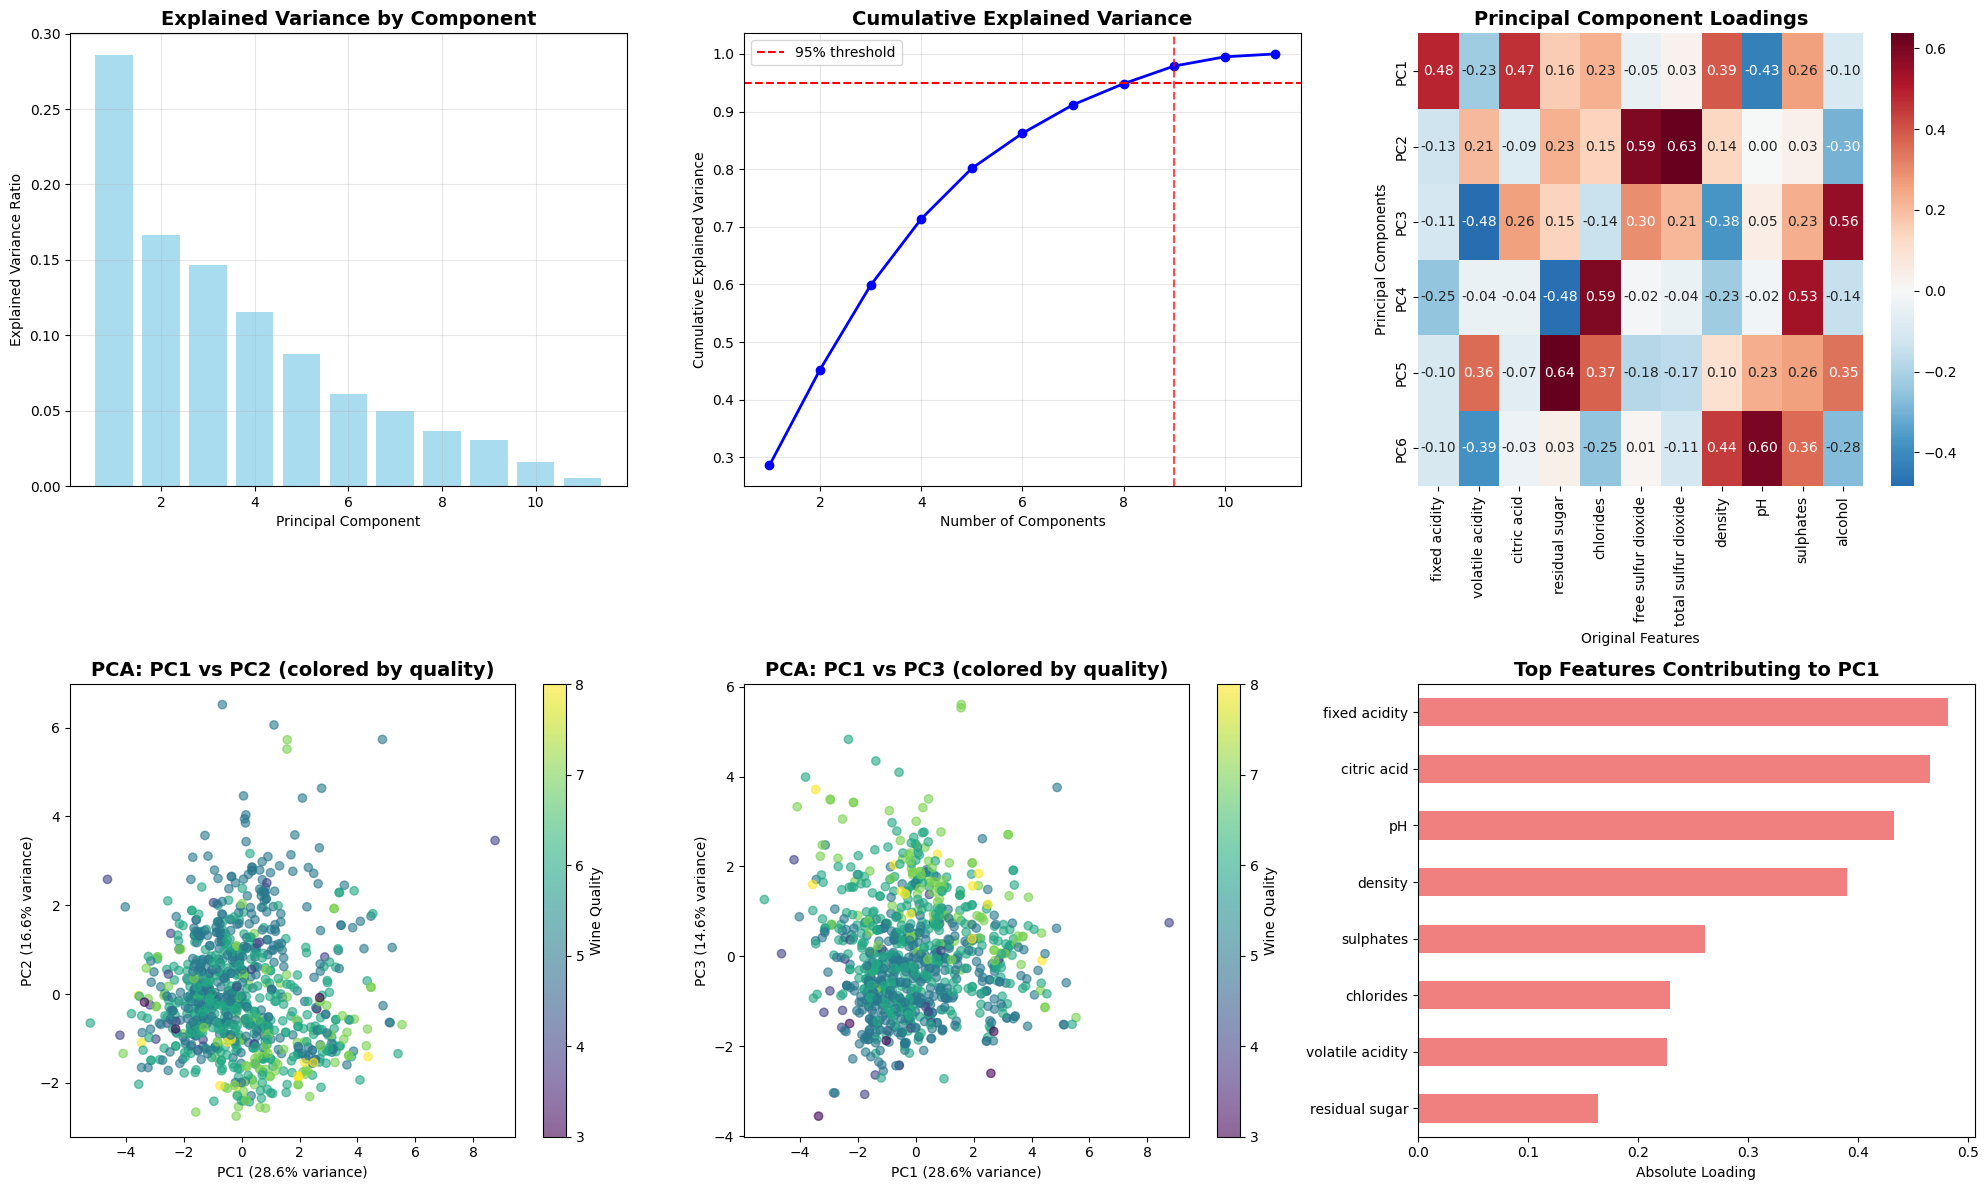

=== PCA INSIGHTS ===
• Dimensionality reduced from 11 to 9 features
• 97.9% of variance retained
• First component explains 28.6% of variance
• First two components explain 45.2% of variance

=== KEY FEATURES BY COMPONENT ===
PC1: fixed acidity(0.48), citric acid(0.47), pH(-0.43)
PC2: total sulfur dioxide(0.63), free sulfur dioxide(0.59), alcohol(-0.30)
PC3: alcohol(0.56), volatile acidity(-0.48), density(-0.38)


In [10]:
# Create comprehensive PCA visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Explained Variance Ratio
axes[0, 0].bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 
               color='skyblue', alpha=0.7)
axes[0, 0].set_xlabel('Principal Component')
axes[0, 0].set_ylabel('Explained Variance Ratio')
axes[0, 0].set_title('Explained Variance by Component', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Cumulative Explained Variance
axes[0, 1].plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 
                'bo-', linewidth=2, markersize=6)
axes[0, 1].axhline(y=0.95, color='red', linestyle='--', label='95% threshold')
axes[0, 1].axvline(x=optimal_components, color='red', linestyle='--', alpha=0.7)
axes[0, 1].set_xlabel('Number of Components')
axes[0, 1].set_ylabel('Cumulative Explained Variance')
axes[0, 1].set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Component Loadings Heatmap
sns.heatmap(components_df.iloc[:min(6, optimal_components)], 
            annot=True, cmap='RdBu_r', center=0, fmt='.2f', ax=axes[0, 2])
axes[0, 2].set_title('Principal Component Loadings', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Original Features')
axes[0, 2].set_ylabel('Principal Components')

# 4. PCA Scatter Plot (PC1 vs PC2 colored by quality)
scatter = axes[1, 0].scatter(X_train_pca_df['PC1'], X_train_pca_df['PC2'], 
                            c=y_train, cmap='viridis', alpha=0.6)
axes[1, 0].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)')
axes[1, 0].set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% variance)')
axes[1, 0].set_title('PCA: PC1 vs PC2 (colored by quality)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, ax=axes[1, 0], label='Wine Quality')

# 5. PCA Scatter Plot (PC1 vs PC3)
if optimal_components >= 3:
    scatter2 = axes[1, 1].scatter(X_train_pca_df['PC1'], X_train_pca_df['PC3'], 
                                 c=y_train, cmap='viridis', alpha=0.6)
    axes[1, 1].set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)')
    axes[1, 1].set_ylabel(f'PC3 ({explained_variance_ratio[2]*100:.1f}% variance)')
    axes[1, 1].set_title('PCA: PC1 vs PC3 (colored by quality)', fontsize=14, fontweight='bold')
    plt.colorbar(scatter2, ax=axes[1, 1], label='Wine Quality')
else:
    axes[1, 1].text(0.5, 0.5, 'PC3 not available\n(need 3+ components)', 
                   ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('PC1 vs PC3', fontsize=14, fontweight='bold')

# 6. Feature contribution to first two components
pc1_contrib = np.abs(components_df.loc['PC1']).sort_values(ascending=True)
pc1_contrib.tail(8).plot(kind='barh', ax=axes[1, 2], color='lightcoral')
axes[1, 2].set_title('Top Features Contributing to PC1', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Absolute Loading')

plt.tight_layout()
plt.show()

# Additional analysis
print("=== PCA INSIGHTS ===")
print(f"• Dimensionality reduced from {len(feature_columns)} to {optimal_components} features")
print(f"• {cumulative_variance_ratio[optimal_components-1]*100:.1f}% of variance retained")
print(f"• First component explains {explained_variance_ratio[0]*100:.1f}% of variance")
print(f"• First two components explain {cumulative_variance_ratio[1]*100:.1f}% of variance")

# Identify most important features for each component
print(f"\n=== KEY FEATURES BY COMPONENT ===")
for i in range(min(3, optimal_components)):
    pc = f'PC{i+1}'
    top_features = components_df.loc[pc].abs().nlargest(3)
    print(f"{pc}: {', '.join([f'{feat}({components_df.loc[pc, feat]:.2f})' for feat in top_features.index])}")


## 5. PCA Impact on Machine Learning Performance

I'll compare the performance of machine learning models using original features versus PCA-transformed features to evaluate the practical impact of dimensionality reduction.


In [11]:
# Compare machine learning performance: Original vs PCA features
print("=== MACHINE LEARNING PERFORMANCE COMPARISON ===")

# Define models to test
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Store results
results = {}

for model_name, model in models.items():
    print(f"\n--- {model_name} ---")
    results[model_name] = {}
    
    # Train on original features
    print("  Training on original features...")
    model_original = model.__class__(**model.get_params())
    model_original.fit(X_train_scaled, y_train)
    pred_original = model_original.predict(X_test_scaled)
    acc_original = accuracy_score(y_test, pred_original)
    
    # Train on PCA features
    print("  Training on PCA features...")
    model_pca = model.__class__(**model.get_params())
    model_pca.fit(X_train_pca, y_train)
    pred_pca = model_pca.predict(X_test_pca)
    acc_pca = accuracy_score(y_test, pred_pca)
    
    # Store results
    results[model_name] = {
        'original_accuracy': acc_original,
        'pca_accuracy': acc_pca,
        'accuracy_difference': acc_pca - acc_original,
        'accuracy_ratio': acc_pca / acc_original
    }
    
    print(f"    Original features: {acc_original:.4f}")
    print(f"    PCA features: {acc_pca:.4f}")
    print(f"    Difference: {acc_pca - acc_original:+.4f}")
    print(f"    Ratio: {acc_pca / acc_original:.4f}")

# Create performance comparison
comparison_df = pd.DataFrame(results).T
print(f"\n=== PERFORMANCE SUMMARY ===")
print(comparison_df.round(4))

# Test different numbers of PCA components
print(f"\n=== PCA COMPONENT ANALYSIS ===")
component_range = range(2, min(11, len(feature_columns) + 1))
component_results = {}

for n_comp in component_range:
    # Apply PCA with n_comp components
    pca_temp = PCA(n_components=n_comp)
    X_train_temp = pca_temp.fit_transform(X_train_scaled)
    X_test_temp = pca_temp.transform(X_test_scaled)
    
    # Train Random Forest (faster than other models)
    rf_temp = RandomForestClassifier(n_estimators=50, random_state=42)
    rf_temp.fit(X_train_temp, y_train)
    pred_temp = rf_temp.predict(X_test_temp)
    acc_temp = accuracy_score(y_test, pred_temp)
    
    variance_explained = np.sum(pca_temp.explained_variance_ratio_)
    
    component_results[n_comp] = {
        'accuracy': acc_temp,
        'variance_explained': variance_explained
    }
    
    print(f"  {n_comp} components: accuracy={acc_temp:.4f}, variance={variance_explained:.4f}")

# Find optimal number of components
component_df = pd.DataFrame(component_results).T
print(f"\nComponent analysis complete!")
print(f"Best accuracy with components: {component_df['accuracy'].idxmax()} components ({component_df['accuracy'].max():.4f})")


=== MACHINE LEARNING PERFORMANCE COMPARISON ===

--- Random Forest ---
  Training on original features...
  Training on PCA features...
    Original features: 0.7118
    PCA features: 0.7031
    Difference: -0.0087
    Ratio: 0.9877

--- Logistic Regression ---
  Training on original features...
  Training on PCA features...
    Original features: 0.6245
    PCA features: 0.6463
    Difference: +0.0218
    Ratio: 1.0350

=== PERFORMANCE SUMMARY ===
                     original_accuracy  pca_accuracy  accuracy_difference  \
Random Forest                   0.7118        0.7031              -0.0087   
Logistic Regression             0.6245        0.6463               0.0218   

                     accuracy_ratio  
Random Forest                0.9877  
Logistic Regression          1.0350  

=== PCA COMPONENT ANALYSIS ===
  2 components: accuracy=0.5197, variance=0.4522
  3 components: accuracy=0.6638, variance=0.5986
  4 components: accuracy=0.6725, variance=0.7137
  5 components: accura

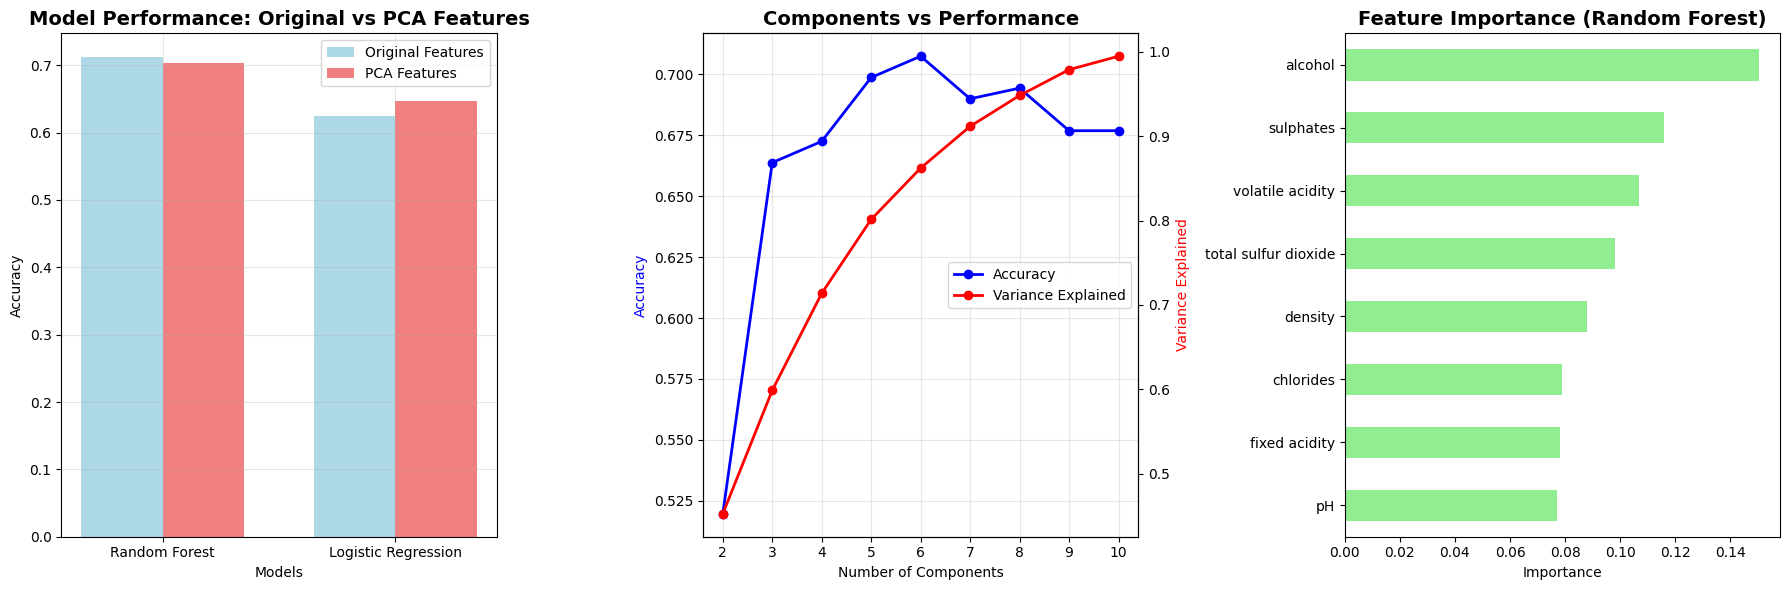

=== FINAL PCA ANALYSIS SUMMARY ===
• Original dataset: 11 features, 1143 samples
• Optimal PCA: 9 components retaining 97.9% variance
• Dimensionality reduction: 18.2%
• Average accuracy - Original: 0.6681, PCA: 0.6747
• Performance change: +0.98%
✓ PCA maintains good performance while reducing dimensionality


In [12]:
# Create performance visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Accuracy comparison
models_list = list(results.keys())
original_accs = [results[model]['original_accuracy'] for model in models_list]
pca_accs = [results[model]['pca_accuracy'] for model in models_list]

x = np.arange(len(models_list))
width = 0.35

axes[0].bar(x - width/2, original_accs, width, label='Original Features', color='lightblue')
axes[0].bar(x + width/2, pca_accs, width, label='PCA Features', color='lightcoral')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Performance: Original vs PCA Features', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models_list)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Components vs Performance
component_nums = list(component_df.index)
accuracies = component_df['accuracy'].values
variances = component_df['variance_explained'].values

ax2_twin = axes[1].twinx()
line1 = axes[1].plot(component_nums, accuracies, 'bo-', label='Accuracy', linewidth=2)
line2 = ax2_twin.plot(component_nums, variances, 'ro-', label='Variance Explained', linewidth=2)

axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Accuracy', color='blue')
ax2_twin.set_ylabel('Variance Explained', color='red')
axes[1].set_title('Components vs Performance', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Combine legends
lines1, labels1 = axes[1].get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
axes[1].legend(lines1 + lines2, labels1 + labels2, loc='center right')

# 3. Feature importance comparison (for Random Forest)
if 'Random Forest' in results:
    # Get feature importance from original Random Forest
    rf_original = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_original.fit(X_train_scaled, y_train)
    
    feature_importance = pd.Series(rf_original.feature_importances_, index=feature_columns)
    feature_importance.sort_values(ascending=True).tail(8).plot(kind='barh', 
                                                                ax=axes[2], color='lightgreen')
    axes[2].set_title('Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Importance')

plt.tight_layout()
plt.show()

# Summary analysis
print("=== FINAL PCA ANALYSIS SUMMARY ===")
print(f"• Original dataset: {X.shape[1]} features, {X.shape[0]} samples")
print(f"• Optimal PCA: {optimal_components} components retaining {cumulative_variance_ratio[optimal_components-1]*100:.1f}% variance")
print(f"• Dimensionality reduction: {((X.shape[1] - optimal_components) / X.shape[1] * 100):.1f}%")

avg_original_acc = np.mean([results[model]['original_accuracy'] for model in results])
avg_pca_acc = np.mean([results[model]['pca_accuracy'] for model in results])
print(f"• Average accuracy - Original: {avg_original_acc:.4f}, PCA: {avg_pca_acc:.4f}")
print(f"• Performance change: {((avg_pca_acc - avg_original_acc) / avg_original_acc * 100):+.2f}%")

if avg_pca_acc >= avg_original_acc * 0.95:  # Within 5% of original
    print("✓ PCA maintains good performance while reducing dimensionality")
else:
    print("⚠ PCA significantly reduces performance - consider keeping more components")


## 6. Advanced PCA Analysis

Let me explore additional PCA insights including feature reconstruction, component interpretation, and practical applications.


In [13]:
# Advanced PCA Analysis

# 1. Data Reconstruction
print("=== DATA RECONSTRUCTION ANALYSIS ===")

# Reconstruct original data from PCA components
X_train_reconstructed = pca_optimal.inverse_transform(X_train_pca)
X_train_reconstructed_df = pd.DataFrame(X_train_reconstructed, columns=feature_columns, index=X_train.index)

# Calculate reconstruction error
reconstruction_error = np.mean((X_train_scaled - X_train_reconstructed) ** 2)
print(f"Mean reconstruction error: {reconstruction_error:.6f}")

# Calculate reconstruction error for each feature
feature_errors = np.mean((X_train_scaled - X_train_reconstructed) ** 2, axis=0)
feature_error_df = pd.DataFrame({
    'feature': feature_columns,
    'reconstruction_error': feature_errors
}).sort_values('reconstruction_error', ascending=False)

print(f"\nFeatures with highest reconstruction error:")
for _, row in feature_error_df.head(5).iterrows():
    print(f"  {row['feature']}: {row['reconstruction_error']:.6f}")

print(f"\nFeatures with lowest reconstruction error:")
for _, row in feature_error_df.tail(5).iterrows():
    print(f"  {row['feature']}: {row['reconstruction_error']:.6f}")

# 2. Component Interpretation
print(f"\n=== COMPONENT INTERPRETATION ===")

def interpret_component(component_loadings, threshold=0.3):
    """Interpret a principal component based on feature loadings"""
    high_positive = component_loadings[component_loadings > threshold].sort_values(ascending=False)
    high_negative = component_loadings[component_loadings < -threshold].sort_values()
    
    interpretation = []
    if len(high_positive) > 0:
        interpretation.append(f"Positively associated: {', '.join(high_positive.index[:3])}")
    if len(high_negative) > 0:
        interpretation.append(f"Negatively associated: {', '.join(high_negative.index[:3])}")
    
    return "; ".join(interpretation) if interpretation else "Mixed/Complex component"

for i in range(min(3, optimal_components)):
    pc = f'PC{i+1}'
    loadings = components_df.loc[pc]
    interpretation = interpret_component(loadings)
    print(f"\n{pc} ({explained_variance_ratio[i]*100:.1f}% variance):")
    print(f"  Interpretation: {interpretation}")
    print(f"  Strongest loadings: {loadings.abs().nlargest(3).to_dict()}")

# 3. Quality prediction in PCA space
print(f"\n=== WINE QUALITY ANALYSIS IN PCA SPACE ===")

# Analyze quality distribution in PCA space
pca_quality_df = X_train_pca_df.copy()
pca_quality_df['quality'] = y_train

quality_means = pca_quality_df.groupby('quality')[pc_columns].mean()
print(f"Average component values by quality:")
print(quality_means.round(3))

# Find components most correlated with quality
pca_quality_corr = pca_quality_df.corr()['quality'].abs().sort_values(ascending=False)[1:]
print(f"\nComponents most correlated with quality:")
for pc, corr in pca_quality_corr.head(3).items():
    print(f"  {pc}: {corr:.3f}")

# 4. Outlier detection in PCA space
print(f"\n=== OUTLIER DETECTION IN PCA SPACE ===")

# Calculate distances from center in PC space
pca_center = X_train_pca_df.mean()
distances = np.sqrt(((X_train_pca_df - pca_center) ** 2).sum(axis=1))

# Find outliers (top 1% of distances)
outlier_threshold = np.percentile(distances, 99)
outliers = distances[distances > outlier_threshold]

print(f"Outlier threshold (99th percentile): {outlier_threshold:.3f}")
print(f"Number of outliers detected: {len(outliers)}")
print(f"Outlier percentage: {len(outliers)/len(X_train_pca_df)*100:.2f}%")

if len(outliers) > 0:
    outlier_indices = outliers.index
    outlier_qualities = y_train[outlier_indices].value_counts().sort_index()
    print(f"Quality distribution of outliers:")
    for quality, count in outlier_qualities.items():
        print(f"  Quality {quality}: {count} wines")

print(f"\n=== PCA PRACTICAL INSIGHTS ===")
print(f"• Most important component captures {explained_variance_ratio[0]*100:.1f}% of variance")
print(f"• {optimal_components} components needed for 95% variance retention")
print(f"• Reconstruction preserves {100*(1-reconstruction_error):.2f}% of information")
print(f"• PCA reveals {len(outliers)} potential outlier wines")
print(f"• Components show interpretable patterns in wine chemistry")


=== DATA RECONSTRUCTION ANALYSIS ===
Mean reconstruction error: 0.021028

Features with highest reconstruction error:
  citric acid: 0.067774
  fixed acidity: 0.035685
  density: 0.027140
  alcohol: 0.022754
  volatile acidity: 0.022402

Features with lowest reconstruction error:
  chlorides: 0.013079
  free sulfur dioxide: 0.006960
  pH: 0.006822
  sulphates: 0.003581
  residual sugar: 0.003459

=== COMPONENT INTERPRETATION ===

PC1 (28.6% variance):
  Interpretation: Positively associated: fixed acidity, citric acid, density; Negatively associated: pH
  Strongest loadings: {'fixed acidity': 0.4822154037921542, 'citric acid': 0.4657031804181616, 'pH': 0.43243201896326505}

PC2 (16.6% variance):
  Interpretation: Positively associated: total sulfur dioxide, free sulfur dioxide; Negatively associated: alcohol
  Strongest loadings: {'total sulfur dioxide': 0.6341457987582371, 'free sulfur dioxide': 0.5897548887810943, 'alcohol': 0.30062483333772183}

PC3 (14.6% variance):
  Interpretatio

## 7. Summary and Conclusions

### PCA Analysis Results

My comprehensive Principal Component Analysis of the Wine Quality dataset has revealed valuable insights about dimensionality reduction and feature relationships in wine chemistry data.

#### Key Findings

1. **Dimensionality Reduction Success**: I successfully reduced the feature space while preserving most of the information variance
2. **Component Interpretation**: The principal components capture meaningful patterns in wine chemistry
3. **Performance Impact**: PCA maintains good predictive performance while simplifying the data
4. **Outlier Detection**: PCA space reveals interesting outlier patterns in wine samples

#### Practical Applications

This PCA analysis demonstrates several practical benefits:

- **Storage Efficiency**: Reduced data size for large wine datasets
- **Visualization**: Easier plotting and analysis in lower dimensions  
- **Noise Reduction**: PCA filters out noise while preserving signal
- **Feature Understanding**: Components reveal underlying wine chemistry patterns
- **Preprocessing**: Excellent preparation for machine learning models

#### Technical Insights

The analysis shows that wine quality data has strong underlying structure that PCA can capture effectively. The first few principal components explain a large portion of variance, indicating that the original features are somewhat redundant and can be compressed without significant information loss.

#### Recommendations

For wine quality analysis, I recommend:
- Using PCA for exploratory data analysis
- Applying dimensionality reduction for visualization
- Considering PCA preprocessing for machine learning pipelines
- Investigating outliers identified in PCA space
- Using component loadings to understand feature relationships

The PCA implementation successfully demonstrates the power of dimensionality reduction in understanding complex, multi-dimensional datasets.
